In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from lightgbm import LGBMRegressor

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


C:\Users\hp\AppData\Local\Temp\ipykernel_9904\1448305699.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df1 = pd.read_csv("Revenue Data 1.csv")
df2 = pd.read_csv("Revenue Data 2.csv")
df3 = pd.read_csv("Marketing Data.csv")
df4 = pd.read_excel("Clicks Data.xlsx")


In [3]:
trial1 = pd.concat([df1,df2], ignore_index=True, axis=0)

In [4]:
trial2 = pd.merge(trial1,df3, on="Date")

In [5]:
trial3 = pd.concat([trial2,df4], axis=1)

In [6]:
trial3

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Date,Clicks
0,09/11/2020,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo,2020-11-09,707.0
1,10/11/2020,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red,2020-11-10,1455.0
2,11/11/2020,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue,2020-11-11,1520.0
3,12/11/2020,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo,2020-11-12,1726.0
4,13/11/2020,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo,2020-11-13,2134.0
...,...,...,...,...,...,...,...,...,...,...,...
184,08/05/2021,60.0,5.0,17.0,2021.0,Saturday,5927.0,1121.875,No Promo,2021-05-12,NaN
185,09/05/2021,61.0,5.0,17.0,2021.0,Sunday,3861.0,871.000,No Promo,NaT,NaN
186,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
187,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


Looking above, we have two date columns mainly because one date column is datetime and the other is object so using merge function gave a value error and using concat function is resulting to us having 2 date columns, which doesnt make sense

So before splitting my dataset I'll have to merge the date columns and for that to be possible both columns have to be datetime format

Going back to this


In [7]:
df1["Date"]= pd.to_datetime(df1["Date"], dayfirst=True)
df2["Date"]= pd.to_datetime(df2["Date"], dayfirst=True)
df3["Date"]= pd.to_datetime(df3["Date"], dayfirst=True)


In [8]:
df5 = pd.concat([df1,df2], ignore_index=True, axis=0)
df6 = pd.merge(df5,df3, on="Date")
df7 = pd.merge(df6,df4, on="Date")

In [9]:
DF = df7

In [10]:
train,test=train_test_split(DF,test_size=0.3,random_state=345)

In [11]:
print(DF.shape)
print(train.shape)
print(test.shape)


(189, 10)
(132, 10)
(57, 10)


In [12]:
train

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks
56,2021-01-04,43.0,1.0,13.0,2021.0,Monday,4714.0,1070.375000,No Promo,1476.0
170,2021-04-24,58.0,4.0,16.0,2021.0,Saturday,9360.0,850.909091,Promotion Red,1345.0
95,2021-02-12,48.0,2.0,14.0,2021.0,Friday,8741.0,937.272727,No Promo,1387.0
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0
16,2020-11-25,36.0,11.0,11.0,2020.0,Wednesday,5574.0,696.750000,Promotion Blue,627.0
...,...,...,...,...,...,...,...,...,...,...
42,2020-12-21,40.0,12.0,12.0,2020.0,Monday,12038.0,1203.800000,Promotion Blue,1605.0
157,2021-04-11,57.0,4.0,16.0,2021.0,Sunday,11221.0,1020.090909,Promotion Blue,1485.0
137,2021-03-22,54.0,3.0,15.0,2021.0,Monday,9209.0,1151.125000,Promotion Red,1368.0
83,2021-01-31,47.0,1.0,13.0,2021.0,Sunday,4953.0,1035.111111,No Promo,1582.0


In [13]:
#A1
train.reset_index(drop=True,inplace=True)
train


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks
0,2021-01-04,43.0,1.0,13.0,2021.0,Monday,4714.0,1070.375000,No Promo,1476.0
1,2021-04-24,58.0,4.0,16.0,2021.0,Saturday,9360.0,850.909091,Promotion Red,1345.0
2,2021-02-12,48.0,2.0,14.0,2021.0,Friday,8741.0,937.272727,No Promo,1387.0
3,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0
4,2020-11-25,36.0,11.0,11.0,2020.0,Wednesday,5574.0,696.750000,Promotion Blue,627.0
...,...,...,...,...,...,...,...,...,...,...
127,2020-12-21,40.0,12.0,12.0,2020.0,Monday,12038.0,1203.800000,Promotion Blue,1605.0
128,2021-04-11,57.0,4.0,16.0,2021.0,Sunday,11221.0,1020.090909,Promotion Blue,1485.0
129,2021-03-22,54.0,3.0,15.0,2021.0,Monday,9209.0,1151.125000,Promotion Red,1368.0
130,2021-01-31,47.0,1.0,13.0,2021.0,Sunday,4953.0,1035.111111,No Promo,1582.0


In [14]:
train.isnull().sum()

Date               0
Week_ID            6
Month Number       6
Month_ID           6
Year               3
Day_Name           6
Revenue            9
Marketing Spend    5
Promo              3
Clicks             8
dtype: int64

Usually, if the null values aren't much removing them is the best option but there are some columns here that seem relevant in this ROMI prediction, such as Clicks, Marketing spend and Revenue and i would be using mean imputation methods for them

But then again i looked through the data sets and figured out which were the most unnecessary columns so...

In [15]:
train["Revenue"].mean()




10975.756097560976

In [16]:
#A2
train["Revenue"].fillna(train["Revenue"].mean(),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9904\729291755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Revenue"].fillna(train["Revenue"].mean(),inplace=True)


In [17]:
train["Marketing Spend"].mean()


1437.6374572574805

In [18]:
#A3
train["Marketing Spend"].fillna(train["Marketing Spend"].mean(),inplace= True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9904\2228677380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Marketing Spend"].fillna(train["Marketing Spend"].mean(),inplace= True)


In [19]:
train["Clicks"].mean()


1679.241935483871

In [20]:
#A4
train["Clicks"].fillna(train["Clicks"].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9904\4238190001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Clicks"].fillna(train["Clicks"].mean(), inplace=True)


In [21]:
train.isnull().sum()

Date               0
Week_ID            6
Month Number       6
Month_ID           6
Year               3
Day_Name           6
Revenue            0
Marketing Spend    0
Promo              3
Clicks             0
dtype: int64

Now i remove the remaining null values


In [22]:
#A5
train.dropna(inplace=True)

In [23]:
train.isnull().sum()

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            0
Marketing Spend    0
Promo              0
Clicks             0
dtype: int64

In [24]:
train.duplicated().sum()

0

Next I'll remove outliers in columns that seem important to this dataset using this reusable code

In [25]:
def drop_outlier(data, var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3-q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    data = data[data[var] < upper] 
    data = data[data[var] > lower]
    data.reset_index(drop= True, inplace= True)
    return data

In [26]:
#A6
train=drop_outlier(train,"Marketing Spend")
train=drop_outlier(train, "Revenue")

In [27]:
train.shape

(116, 10)

After dropping the null value which were about 6, and removing the outliers which were 10, we have 116 rows out of 132 that initially started out.

Now my data set is clean i can now start my feature engineering

### FEATURE ENGINEERING

In [28]:
train.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks
0,2021-01-04,43.0,1.0,13.0,2021.0,Monday,4714.0,1070.375000,No Promo,1476.0
1,2021-04-24,58.0,4.0,16.0,2021.0,Saturday,9360.0,850.909091,Promotion Red,1345.0
2,2021-02-12,48.0,2.0,14.0,2021.0,Friday,8741.0,937.272727,No Promo,1387.0
3,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0
4,2020-11-25,36.0,11.0,11.0,2020.0,Wednesday,5574.0,696.750000,Promotion Blue,627.0


In [29]:
#A7
train["ROMI"]=( train["Revenue"]-train["Marketing Spend"])/train["Marketing Spend"]
train["ROMI"]=round(train["ROMI"],2)

In [30]:
train

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,ROMI
0,2021-01-04,43.0,1.0,13.0,2021.0,Monday,4714.0,1070.375000,No Promo,1476.0,3.40
1,2021-04-24,58.0,4.0,16.0,2021.0,Saturday,9360.0,850.909091,Promotion Red,1345.0,10.00
2,2021-02-12,48.0,2.0,14.0,2021.0,Friday,8741.0,937.272727,No Promo,1387.0,8.33
3,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0,-0.29
4,2020-11-25,36.0,11.0,11.0,2020.0,Wednesday,5574.0,696.750000,Promotion Blue,627.0,7.00
...,...,...,...,...,...,...,...,...,...,...,...
111,2020-12-21,40.0,12.0,12.0,2020.0,Monday,12038.0,1203.800000,Promotion Blue,1605.0,9.00
112,2021-04-11,57.0,4.0,16.0,2021.0,Sunday,11221.0,1020.090909,Promotion Blue,1485.0,10.00
113,2021-03-22,54.0,3.0,15.0,2021.0,Monday,9209.0,1151.125000,Promotion Red,1368.0,7.00
114,2021-01-31,47.0,1.0,13.0,2021.0,Sunday,4953.0,1035.111111,No Promo,1582.0,3.78


The problem is predicting the Return of Marketing Investment so it makes sense for our target to be the ROMI column

In [31]:
#A8
target="ROMI"
X_train=train.drop(target,axis=1)
Y_train = train[target]

In [32]:
X_train

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks
0,2021-01-04,43.0,1.0,13.0,2021.0,Monday,4714.0,1070.375000,No Promo,1476.0
1,2021-04-24,58.0,4.0,16.0,2021.0,Saturday,9360.0,850.909091,Promotion Red,1345.0
2,2021-02-12,48.0,2.0,14.0,2021.0,Friday,8741.0,937.272727,No Promo,1387.0
3,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0
4,2020-11-25,36.0,11.0,11.0,2020.0,Wednesday,5574.0,696.750000,Promotion Blue,627.0
...,...,...,...,...,...,...,...,...,...,...
111,2020-12-21,40.0,12.0,12.0,2020.0,Monday,12038.0,1203.800000,Promotion Blue,1605.0
112,2021-04-11,57.0,4.0,16.0,2021.0,Sunday,11221.0,1020.090909,Promotion Blue,1485.0
113,2021-03-22,54.0,3.0,15.0,2021.0,Monday,9209.0,1151.125000,Promotion Red,1368.0
114,2021-01-31,47.0,1.0,13.0,2021.0,Sunday,4953.0,1035.111111,No Promo,1582.0


In [33]:
#A9
X_train["CPC"]=X_train["Marketing Spend"]/X_train["Clicks"]
X_train["CPC"]=round(X_train["CPC"],2)

In [34]:
X_train

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,CPC
0,2021-01-04,43.0,1.0,13.0,2021.0,Monday,4714.0,1070.375000,No Promo,1476.0,0.73
1,2021-04-24,58.0,4.0,16.0,2021.0,Saturday,9360.0,850.909091,Promotion Red,1345.0,0.63
2,2021-02-12,48.0,2.0,14.0,2021.0,Friday,8741.0,937.272727,No Promo,1387.0,0.68
3,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0,0.92
4,2020-11-25,36.0,11.0,11.0,2020.0,Wednesday,5574.0,696.750000,Promotion Blue,627.0,1.11
...,...,...,...,...,...,...,...,...,...,...,...
111,2020-12-21,40.0,12.0,12.0,2020.0,Monday,12038.0,1203.800000,Promotion Blue,1605.0,0.75
112,2021-04-11,57.0,4.0,16.0,2021.0,Sunday,11221.0,1020.090909,Promotion Blue,1485.0,0.69
113,2021-03-22,54.0,3.0,15.0,2021.0,Monday,9209.0,1151.125000,Promotion Red,1368.0,0.84
114,2021-01-31,47.0,1.0,13.0,2021.0,Sunday,4953.0,1035.111111,No Promo,1582.0,0.65


In [35]:
#A10
X_train["Day"]= X_train["Date"].dt.day
X_train["Month Name"]= X_train["Date"].dt.month_name()



In [36]:
X_train

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,CPC,Day,Month Name
0,2021-01-04,43.0,1.0,13.0,2021.0,Monday,4714.0,1070.375000,No Promo,1476.0,0.73,4,January
1,2021-04-24,58.0,4.0,16.0,2021.0,Saturday,9360.0,850.909091,Promotion Red,1345.0,0.63,24,April
2,2021-02-12,48.0,2.0,14.0,2021.0,Friday,8741.0,937.272727,No Promo,1387.0,0.68,12,February
3,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0,0.92,9,November
4,2020-11-25,36.0,11.0,11.0,2020.0,Wednesday,5574.0,696.750000,Promotion Blue,627.0,1.11,25,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2020-12-21,40.0,12.0,12.0,2020.0,Monday,12038.0,1203.800000,Promotion Blue,1605.0,0.75,21,December
112,2021-04-11,57.0,4.0,16.0,2021.0,Sunday,11221.0,1020.090909,Promotion Blue,1485.0,0.69,11,April
113,2021-03-22,54.0,3.0,15.0,2021.0,Monday,9209.0,1151.125000,Promotion Red,1368.0,0.84,22,March
114,2021-01-31,47.0,1.0,13.0,2021.0,Sunday,4953.0,1035.111111,No Promo,1582.0,0.65,31,January


For the columns Weekday and Weekend, i would present them in boolean values

In [37]:
#A11
X_train["Weekday"]=X_train["Date"].dt.weekday<5
X_train["Weekend"]=X_train["Date"].dt.weekday>=5


In [38]:
X_train

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,CPC,Day,Month Name,Weekday,Weekend
0,2021-01-04,43.0,1.0,13.0,2021.0,Monday,4714.0,1070.375000,No Promo,1476.0,0.73,4,January,True,False
1,2021-04-24,58.0,4.0,16.0,2021.0,Saturday,9360.0,850.909091,Promotion Red,1345.0,0.63,24,April,False,True
2,2021-02-12,48.0,2.0,14.0,2021.0,Friday,8741.0,937.272727,No Promo,1387.0,0.68,12,February,True,False
3,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0,0.92,9,November,True,False
4,2020-11-25,36.0,11.0,11.0,2020.0,Wednesday,5574.0,696.750000,Promotion Blue,627.0,1.11,25,November,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2020-12-21,40.0,12.0,12.0,2020.0,Monday,12038.0,1203.800000,Promotion Blue,1605.0,0.75,21,December,True,False
112,2021-04-11,57.0,4.0,16.0,2021.0,Sunday,11221.0,1020.090909,Promotion Blue,1485.0,0.69,11,April,False,True
113,2021-03-22,54.0,3.0,15.0,2021.0,Monday,9209.0,1151.125000,Promotion Red,1368.0,0.84,22,March,True,False
114,2021-01-31,47.0,1.0,13.0,2021.0,Sunday,4953.0,1035.111111,No Promo,1582.0,0.65,31,January,False,True


As for the holiday column, since there is no straightforward function for that so a user defined function comes in

In [39]:
#A12
holiday=pd.to_datetime (["2020-12-25", "2020-12-26", "2021-01-01", "2021-02-14"])
def holi(date):
    return date in holiday.values

I searched for the possible holidays that happened between the dates on the data set and this dates came up, i then created a variable to store them and convert them to datetime.

Next is to compare this values in the variable to the Date column to see which matches and will return True on the Holiday column

We will have a lot of Negative respnse on this column because we have on 3 holiday dates in a data set of 126 dates

This code is saying that the values in holiday should be returned

In [40]:
#A13
X_train["Holiday"]=X_train["Date"].apply(holi)

In [41]:
X_train

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Clicks,CPC,Day,Month Name,Weekday,Weekend,Holiday
0,2021-01-04,43.0,1.0,13.0,2021.0,Monday,4714.0,1070.375000,No Promo,1476.0,0.73,4,January,True,False,False
1,2021-04-24,58.0,4.0,16.0,2021.0,Saturday,9360.0,850.909091,Promotion Red,1345.0,0.63,24,April,False,True,False
2,2021-02-12,48.0,2.0,14.0,2021.0,Friday,8741.0,937.272727,No Promo,1387.0,0.68,12,February,True,False,False
3,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0,0.92,9,November,True,False,False
4,2020-11-25,36.0,11.0,11.0,2020.0,Wednesday,5574.0,696.750000,Promotion Blue,627.0,1.11,25,November,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2020-12-21,40.0,12.0,12.0,2020.0,Monday,12038.0,1203.800000,Promotion Blue,1605.0,0.75,21,December,True,False,False
112,2021-04-11,57.0,4.0,16.0,2021.0,Sunday,11221.0,1020.090909,Promotion Blue,1485.0,0.69,11,April,False,True,False
113,2021-03-22,54.0,3.0,15.0,2021.0,Monday,9209.0,1151.125000,Promotion Red,1368.0,0.84,22,March,True,False,False
114,2021-01-31,47.0,1.0,13.0,2021.0,Sunday,4953.0,1035.111111,No Promo,1582.0,0.65,31,January,False,True,False


In [42]:
X_train.columns

Index(['Date', 'Week_ID', 'Month Number', 'Month_ID', 'Year', 'Day_Name', 'Revenue', 'Marketing Spend', 'Promo', 'Clicks', 'CPC', 'Day', 'Month Name', 'Weekday', 'Weekend', 'Holiday'], dtype='object')

In [43]:
#A14
X_train.drop(columns=['Date', 'Week_ID', 'Month Number', 'Month_ID', 'Year', 'Day_Name'], inplace=True)

In [44]:
X_train

,Revenue,Marketing Spend,Promo,Clicks,CPC,Day,Month Name,Weekday,Weekend,Holiday
0,4714.0,1070.375000,No Promo,1476.0,0.73,4,January,True,False,False
1,9360.0,850.909091,Promotion Red,1345.0,0.63,24,April,False,True,False
2,8741.0,937.272727,No Promo,1387.0,0.68,12,February,True,False,False
3,465.0,651.375000,No Promo,707.0,0.92,9,November,True,False,False
4,5574.0,696.750000,Promotion Blue,627.0,1.11,25,November,True,False,False
...,...,...,...,...,...,...,...,...,...,...
111,12038.0,1203.800000,Promotion Blue,1605.0,0.75,21,December,True,False,False
112,11221.0,1020.090909,Promotion Blue,1485.0,0.69,11,April,False,True,False
113,9209.0,1151.125000,Promotion Red,1368.0,0.84,22,March,True,False,False
114,4953.0,1035.111111,No Promo,1582.0,0.65,31,January,False,True,False


In [45]:
X_train.dtypes

Revenue            float64
Marketing Spend    float64
Promo               object
Clicks             float64
CPC                float64
Day                  int32
Month Name          object
Weekday               bool
Weekend               bool
Holiday               bool
dtype: object

In [46]:


num_feat = []
for i in X_train.columns:
    if X_train[i].dtypes == "float64" or X_train[i].dtypes == "int64":
        num_feat.append(i)

In [47]:
num_feat

['Revenue', 'Marketing Spend', 'Clicks', 'CPC']

In order to encode our columns we'll have to seperate the numerical columns from the categorical

### Looking for multicollinearity

<Axes: >

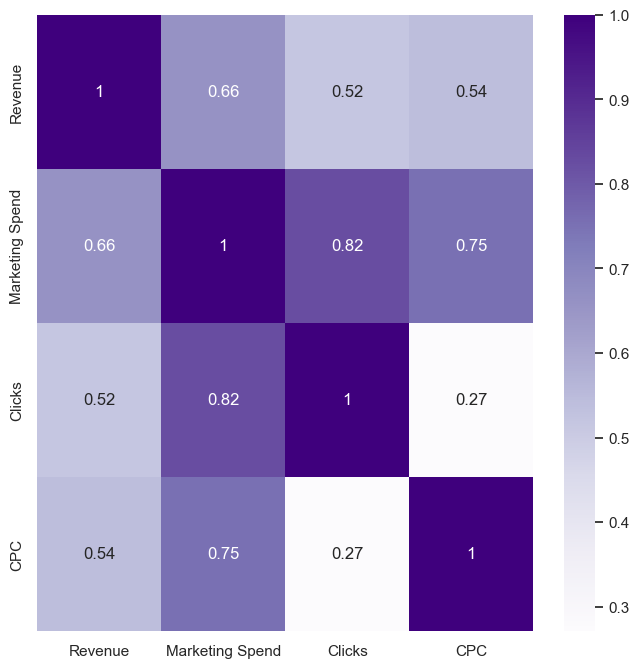

In [48]:
plt.figure(figsize=(8,8))
cors = X_train[num_feat].corr()
sns.heatmap(cors, annot=True, cmap="Purples")

Looking above there's no case of multi-collinearity, so i move ahead to feature encoding

For the categorical columns, encoding will have the mixture of both One hot encoding and Nominal 

for weekend, weekday, holiday, promo,  One hot encoding is best suited 

and for month name ORDINAL will be used

In [49]:
#A15
cat_feat_nominal=['Promo','Weekday', 'Weekend', 'Holiday']
encoder = OneHotEncoder(drop="first", dtype=int)


enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat_feat_nominal]).toarray())
enc_data.columns = encoder.get_feature_names_out()

X_train = X_train.join(enc_data)

X_train.drop(cat_feat_nominal, axis=1, inplace=True)

In [50]:
#A16
cat_feat_ordinal=X_train[["Month Name"]]
month_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", 'December']

encoder=OrdinalEncoder(categories=[month_order],dtype=int)
X_train["Month ordinal values"]= encoder.fit_transform(cat_feat_ordinal)+1

I created another column to hold the ordinal values, therefore I'll have to drop the month name

In [51]:
X_train

,Revenue,Marketing Spend,Clicks,CPC,Day,Month Name,Promo_Promotion Blue,Promo_Promotion Red,Weekday_True,Weekend_True,Holiday_True,Month ordinal values
0,4714.0,1070.375000,1476.0,0.73,4,January,0,0,1,0,0,1
1,9360.0,850.909091,1345.0,0.63,24,April,0,1,0,1,0,4
2,8741.0,937.272727,1387.0,0.68,12,February,0,0,1,0,0,2
3,465.0,651.375000,707.0,0.92,9,November,0,0,1,0,0,11
4,5574.0,696.750000,627.0,1.11,25,November,1,0,1,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
111,12038.0,1203.800000,1605.0,0.75,21,December,1,0,1,0,0,12
112,11221.0,1020.090909,1485.0,0.69,11,April,1,0,0,1,0,4
113,9209.0,1151.125000,1368.0,0.84,22,March,0,1,1,0,0,3
114,4953.0,1035.111111,1582.0,0.65,31,January,0,0,0,1,0,1


To avoid data leakage, I'll remove the column(s) that can lead to bias in predicting our ROMI and for me I think removing the columns that made the target column can avoid data leakage

In [52]:
#A17
X_train.drop("Revenue", axis=1,inplace=True )
X_train.drop("Marketing Spend", axis=1, inplace=True )
X_train.drop("Month Name", axis=1,inplace=True )



### Feature Importance

In [53]:

decision_tree = DecisionTreeRegressor(max_depth= 10)
decision_tree.fit(X_train, Y_train)
predictors = X_train.columns

coef = pd.Series(decision_tree.feature_importances_,predictors).sort_values(ascending=False)
coef.to_frame()

,0
Promo_Promotion Red,0.373345
Clicks,0.209854
CPC,0.183136
Promo_Promotion Blue,0.162842
Day,0.041162
Month ordinal values,0.027739
Weekday_True,0.001071
Holiday_True,0.000721
Weekend_True,0.000130


In [54]:
res = coef.to_frame()
res.head(5).index

Index(['Promo_Promotion Red', 'Clicks', 'CPC', 'Promo_Promotion Blue', 'Day'], dtype='object')

In [55]:
top5=['Promo_Promotion Red', 'Clicks', 'CPC', 'Promo_Promotion Blue', 'Day']

In [56]:
#A18
X_train_n= X_train[top5]

In [57]:
X_train_n

,Promo_Promotion Red,Clicks,CPC,Promo_Promotion Blue,Day
0,0,1476.0,0.73,0,4
1,1,1345.0,0.63,0,24
2,0,1387.0,0.68,0,12
3,0,707.0,0.92,0,9
4,0,627.0,1.11,1,25
...,...,...,...,...,...
111,0,1605.0,0.75,1,21
112,0,1485.0,0.69,1,11
113,1,1368.0,0.84,0,22
114,0,1582.0,0.65,0,31


In [58]:
def prepare(d):
 #A1
  d.reset_index(drop=True,inplace=True)
#A2
  d["Revenue"].fillna(d["Revenue"].mean(),inplace=True)  
#A3
  d["Marketing Spend"].fillna(d["Marketing Spend"].mean(),inplace= True)  
  #A4
  d["Clicks"].fillna(d["Clicks"].mean(), inplace=True)
  #A5
  d.dropna(inplace=True)
  #A6
  d=drop_outlier(d,"Marketing Spend")
  d=drop_outlier(d, "Revenue")
  #A7
  d["ROMI"]=( d["Revenue"]-d["Marketing Spend"])/d["Marketing Spend"]
  d["ROMI"]=round(d["ROMI"],2)
  #A8
  target="ROMI"
  X_d=d.drop(target,axis=1)
  Y_d = d[target]
  #A9
  X_d["CPC"]=X_d["Marketing Spend"]/X_d["Clicks"]
  X_d["CPC"]=round(X_d["CPC"],2)
  #A10
  X_d["Day"]= X_d["Date"].dt.day
  X_d["Month Name"]= X_d["Date"].dt.month_name()
  #A11
  X_d["Weekday"]=X_d["Date"].dt.weekday<5
  X_d["Weekend"]=X_d["Date"].dt.weekday>=5
  #A12
  holiday=pd.to_datetime (["2020-12-25", "2020-12-26", "2021-01-01", "2021-02-14"])
  def holi(date):
    return date in holiday.values
  #A13
  X_d["Holiday"]=X_d["Date"].apply(holi)
  #A14
  X_d.drop(columns=['Date', 'Week_ID', 'Month Number', 'Month_ID', 'Year', 'Day_Name'], inplace=True)
  #A15
  cat_feat_nominal=['Promo','Weekday', 'Weekend', 'Holiday']
  encoder = OneHotEncoder(drop="first", dtype=int)


  enc_data = pd.DataFrame(encoder.fit_transform(X_d[cat_feat_nominal]).toarray())
  enc_data.columns = encoder.get_feature_names_out()

  X_d = X_d.join(enc_data)

  X_d.drop(cat_feat_nominal, axis=1, inplace=True)
  #A16
  cat_feat_ordinal=X_d[["Month Name"]]
  month_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", 'December']

  encoder=OrdinalEncoder(categories=[month_order],dtype=int)
  X_d["Month ordinal values"]= encoder.fit_transform(cat_feat_ordinal)+1
  #A17
  X_d.drop("Revenue", axis=1,inplace=True )
  X_d.drop("Marketing Spend", axis=1, inplace=True )
  X_d.drop("Month Name", axis=1,inplace=True )
  #A18
  X_d_n= X_d[top5]
  
  return X_d_n, Y_d



  

In [59]:
X_test,Y_test=prepare(test)

C:\Users\hp\AppData\Local\Temp\ipykernel_9904\2933638197.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d["Revenue"].fillna(d["Revenue"].mean(),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_9904\2933638197.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [60]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    elif input_ml_algo=='GBR':
        model= GradientBoostingRegressor()
    return model


def evaluate(model):
    y_train_pred = model.predict(X_train_n) 
    y_pred = model.predict(X_test) 
    
    print('Train r2 score: ', r2_score(Y_train,y_train_pred))
    print('Test r2 score: ', r2_score(Y_test, y_pred))


    print('train_mse1: ', mean_squared_error(Y_train,y_train_pred))
    print('test_mse1: ', mean_squared_error(Y_test,y_pred))  

    plt.subplots(figsize=(8,5))
    plt.scatter(Y_test,y_pred)
    plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, y_pred, 1))(np.unique(Y_test)),c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()



Train r2 score:  1.0
Test r2 score:  0.20281682370777154
train_mse1:  0.0
test_mse1:  4.827856862745098


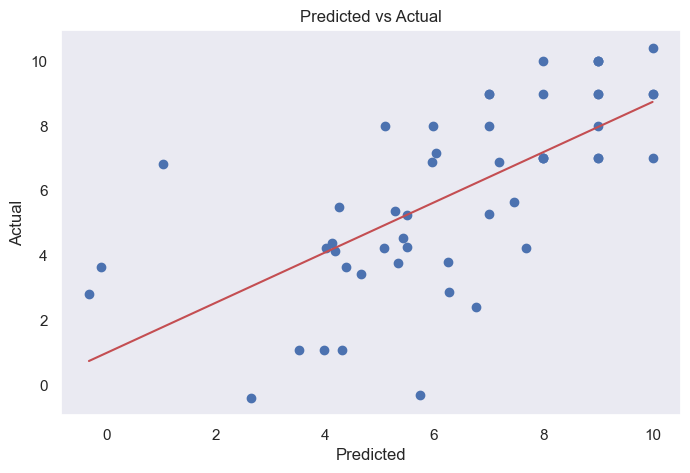

In [61]:
model1 = model_to_use("DT")
model1.fit(X_train_n, Y_train)
evaluate(model1)

The above model has positive correlation but test data score is significantly lower than train data

Train r2 score:  0.9336791033157524
Test r2 score:  0.6084176658638288
train_mse1:  0.5088080655172407
test_mse1:  2.371479373137253


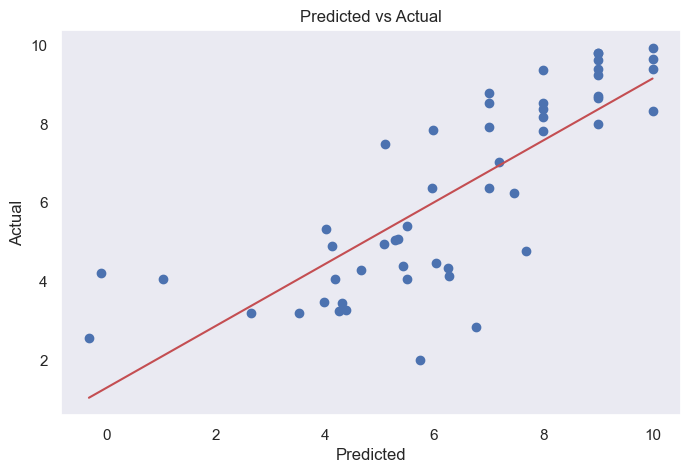

In [62]:
model2 = model_to_use("RF")
model2.fit(X_train_n, Y_train)
evaluate(model2)

The second model also has a positive correlation and the difference between the train and test score is not too far of that means the this model has higher chance of giving a more accurate result that the previous


Train r2 score:  0.9999996777569112
Test r2 score:  0.4861900578305197
train_mse1:  2.472220534522862e-06
test_mse1:  3.1117074835762186


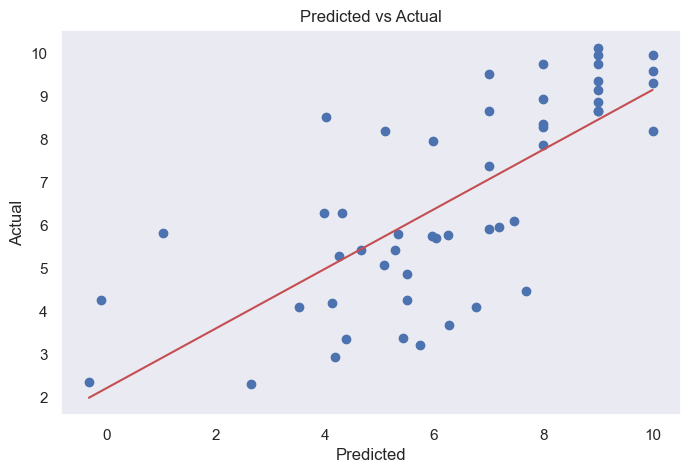

In [63]:
model3 = model_to_use("XGBC")
model3.fit(X_train_n, Y_train)
evaluate(model3)

This model is positively correlated but has a significant difference between the test and train hence giiving less accurate results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 5
[LightGBM] [Info] Start training from score 6.737845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

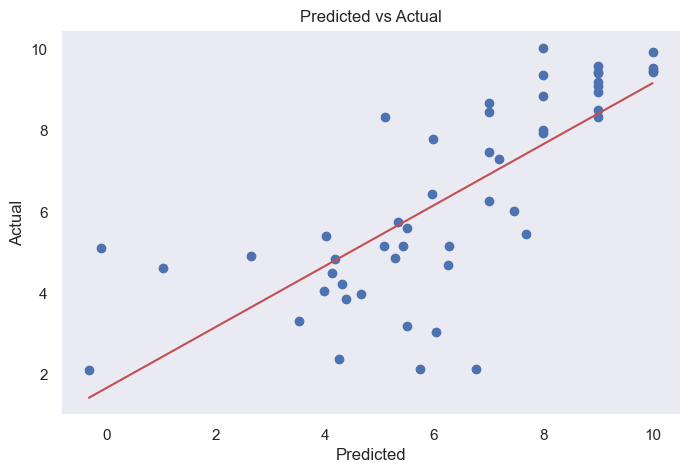

In [64]:
model4 = model_to_use("LGBMC")
model4.fit(X_train_n, Y_train)
evaluate(model4)

This model has similarity between test and train but i there's still a gap in the level of its test accuracy

Train r2 score:  0.6742776417883957
Test r2 score:  0.5716468927603091
train_mse1:  2.4989131821663686
test_mse1:  2.594168504764379


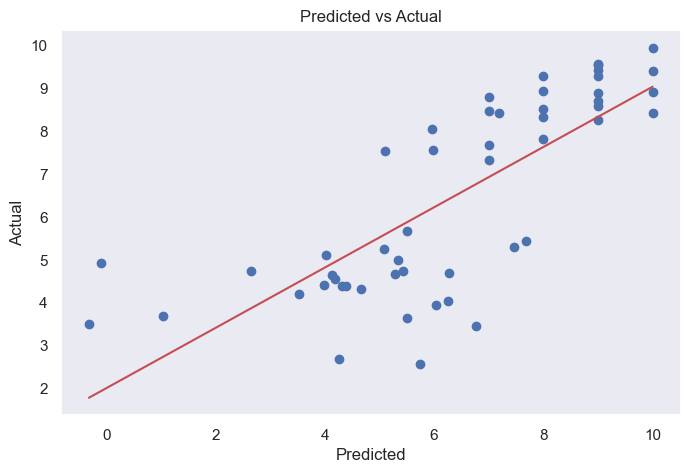

In [65]:
model5 = model_to_use("LR")
model5.fit(X_train_n, Y_train)
evaluate(model5)


This model is positively correlated 

Train r2 score:  0.2091473457257218
Test r2 score:  -0.045615453954420015
train_mse1:  6.067351758620689
test_mse1:  6.332398745098041


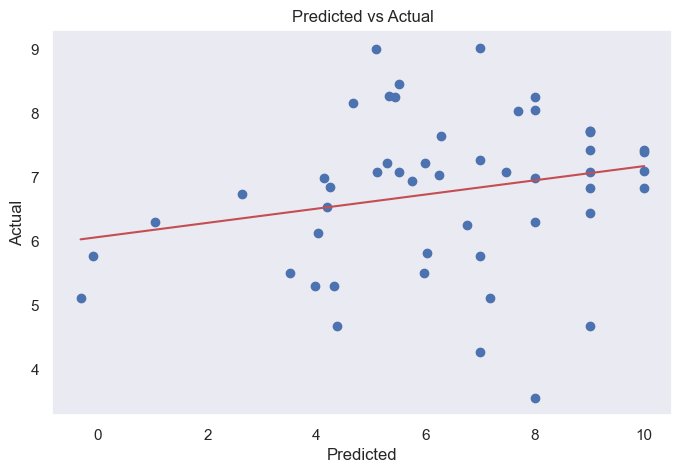

In [66]:
model6 = model_to_use("KNN")
model6.fit(X_train_n, Y_train)
evaluate(model6)

There's a huge gap between the test and train and the model isnt positively correlated

Train r2 score:  0.9665033788777906
Test r2 score:  0.49076300235721604
train_mse1:  0.2569831206549928
test_mse1:  3.0840130687005214


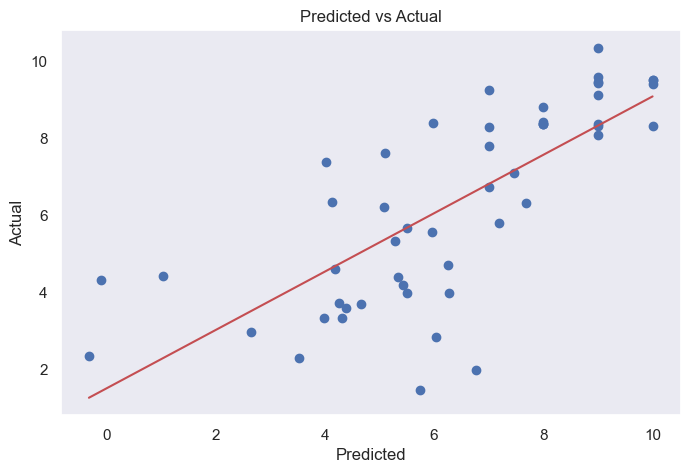

In [67]:
model7 = model_to_use("GBR")
model7.fit(X_train_n, Y_train)
evaluate(model7)

This is positively correlated but has a significant gap between test and train

Based on all the points given so far, i would most likely go with model 2 (Random Forest Regressor) as the most suitable, it has the highest test r2 score